In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_decision_regions
from sklearn.tree import DecisionTreeClassifier

In [2]:
data = pd.read_csv('Real estate.csv')
data.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [3]:
data.isna().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [4]:
data.columns = data.columns.str.strip()

In [5]:
data.drop('No', axis=1, inplace=True)

In [6]:
print(data.isnull().sum())     # Check missing values
print(data.duplicated().sum())  # Check duplicates

# Drop duplicates if any
data = data.drop_duplicates()


X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64
0


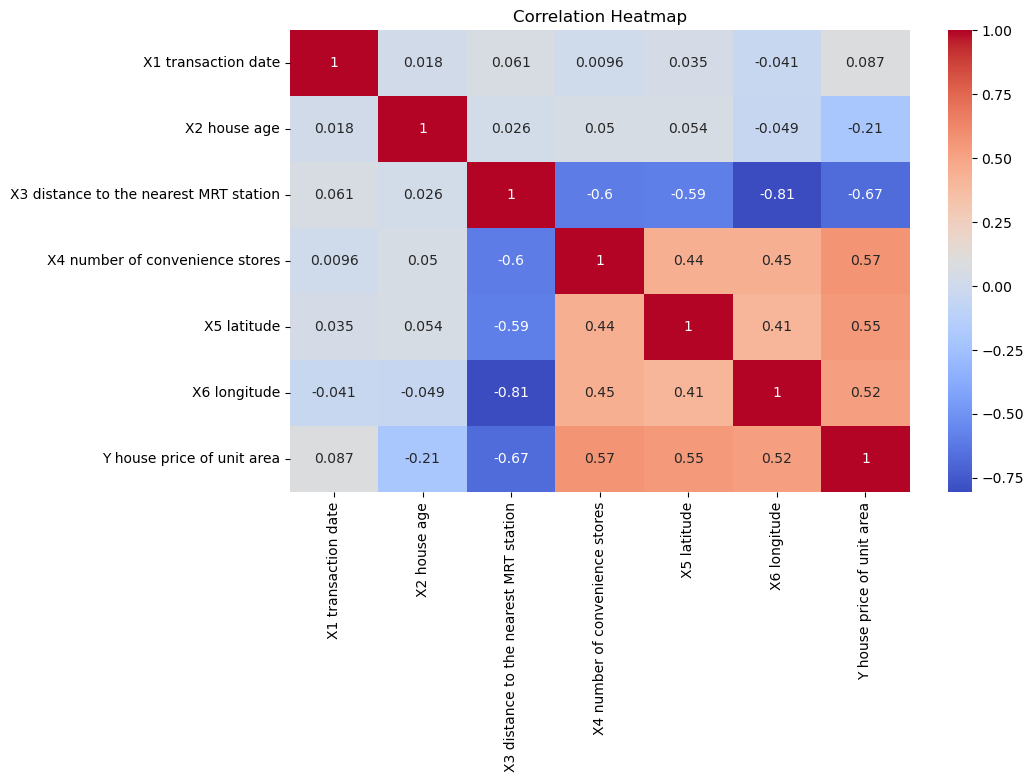

In [7]:
# Correlation matrix
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Pairplot (optional)
# sns.pairplot(data)

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Step 1: Load and rename
df = pd.read_csv("Real estate.csv")
df.columns = ['No', 'TransactionDate', 'HouseAge', 'DistanceToMRT', 'ConvenienceStores',
              'Latitude', 'Longitude', 'PricePerUnitArea']

# Step 2: Drop ID column
df.drop('No', axis=1, inplace=True)

# Step 3: Check correlation
correlation = df.corr()['PricePerUnitArea'].sort_values(ascending=False)
print("Correlation with target:\n", correlation)

# Optional: Drop low correlation features if any
# In this case, let’s assume everything is moderately correlated
# If a column has correlation < 0.05, you might consider dropping it.

# Step 4: Split
X = df.drop('PricePerUnitArea', axis=1)
y = df['PricePerUnitArea']

# Step 5: Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 6: Train/test split
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 7: Train models
lr = LinearRegression()
lr.fit(x_train, y_train)
lr_pred = lr.predict(x_test)

rf = RandomForestRegressor(random_state=42)
rf.fit(x_train, y_train)
rf_pred = rf.predict(x_test)

# Step 8: Evaluate
print(f"Linear Regression R²: {r2_score(y_test, lr_pred):.3f}")
print(f"Random Forest R²: {r2_score(y_test, rf_pred):.3f}")


Correlation with target:
 PricePerUnitArea     1.000000
ConvenienceStores    0.571005
Latitude             0.546307
Longitude            0.523287
TransactionDate      0.087491
HouseAge            -0.210567
DistanceToMRT       -0.673613
Name: PricePerUnitArea, dtype: float64
Linear Regression R²: 0.681
Random Forest R²: 0.807


In [9]:
X = df.drop(['TransactionDate', 'HouseAge'], axis=1)


In [10]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
}

grid = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='r2')
grid.fit(x_train, y_train)

best_model = grid.best_estimator_
y_pred = best_model.predict(x_test)

print("Tuned Random Forest R²:", r2_score(y_test, y_pred))


Tuned Random Forest R²: 0.8173713417999822


In [11]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor()
gbr.fit(x_train, y_train)
print("GBR R²:", r2_score(y_test, gbr.predict(x_test)))


GBR R²: 0.7846639553311989
